In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
!pip install pandas_market_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.6/189.6 KB 21.4 MB/s eta 0:00:00


In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 5.4 MB/s eta 0:00:00


In [4]:
#The idea here is that having a portfolio of different types of assets is less risky than having ones that are similar.

import yfinance
# from yahoofinancials import YahooFinancials
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------
sns.set()

In [6]:
stocknames = ['TSLA','AMZN', 'ETH-USD', 'DDOG', 'BTC-USD', 'MATIC-USD', 'CL=F']
startdate = '2019-01-01'
enddate =   dt.datetime.now().date()
# enddate = '2019-12-31'
interval = '1d'

In [7]:
for stock in stocknames:
    path = 'D:/DA/'+stock+'.csv'  # Change to your path or use another method to download the stock files from yahoo as mentioned in Part one
    if os.path.isfile(path) == False:
        df = yfinance.download(stock, interval= interval, period='max')
        df.to_csv('{}.csv'.format(stock))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
def appending(cols=[], startdate = '', enddate = ''):
    '''append stocks data into one file and then select the Adj Close column'''
    global df
    dates = pd.date_range(start= startdate, end= enddate)
    df = pd.DataFrame(index= dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close' : stock})
        df = df.join(df_symbols)
        df = df.loc[dates]
    df = df.dropna()
    return df

In [9]:
appending(['Date', 'Adj Close'], startdate, enddate)
df.index.names = ['Date']
df.head()

,TSLA,AMZN,ETH-USD,DDOG,BTC-USD,MATIC-USD,CL=F
Date,,,,,,,
2019-09-19,16.44,91.07,221.28,37.55,"10,266.42",0.01,58.13
2019-09-20,16.04,89.71,218.05,36.15,"10,181.64",0.01,58.09
2019-09-23,16.08,89.26,201.92,36.11,"9,729.32",0.01,58.64
2019-09-24,14.88,87.08,168.11,34.50,"8,620.57",0.01,57.29
2019-09-25,15.25,88.42,170.89,35.25,"8,486.99",0.01,56.49


In [11]:
df = df.rename(columns={'BTC-USD' : 'BTC', 'MATIC-USD' : 'MATIC', 'TSLA' : 'TESLA', 'DDOG' : 'DATA_DOG'})
df.head()

,TESLA,AMZN,ETH-USD,DATA_DOG,BTC,MATIC,CL=F
Date,,,,,,,
2019-09-19,16.44,91.07,221.28,37.55,"10,266.42",0.01,58.13
2019-09-20,16.04,89.71,218.05,36.15,"10,181.64",0.01,58.09
2019-09-23,16.08,89.26,201.92,36.11,"9,729.32",0.01,58.64
2019-09-24,14.88,87.08,168.11,34.50,"8,620.57",0.01,57.29
2019-09-25,15.25,88.42,170.89,35.25,"8,486.99",0.01,56.49


In [12]:
daily_returns = df.pct_change().dropna()

In [13]:
!pip install PyPortfolioOpt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [14]:
from pypfopt import HRPOpt
# run the optimization algorithm to get the weights:
hrp = HRPOpt(daily_returns)
hrp_weights = hrp.optimize()

# performance of the portfolio and the weights:
hrp.portfolio_performance(verbose=True)
hrp_weights = dict(hrp_weights)
print(hrp_weights)

Expected annual return: 37.8%
Annual volatility: 42.2%
Sharpe Ratio: 0.85
{'AMZN': 0.43366187053758043, 'BTC': 0.13585327453260035, 'CL=F': 0.03313382343901118, 'DATA_DOG': 0.14199921080531464, 'ETH-USD': 0.08587550619696939, 'MATIC': 0.034451651788478505, 'TESLA': 0.13502466270004546}


In [15]:
sum(hrp_weights.values())

0.9999999999999999

In [16]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'AMZN': 51, 'DATA_DOG': 22, 'TESLA': 12, 'ETH-USD': 1, 'MATIC': 433, 'CL=F': 4}
Funds remaining (HRP): $1103.89


In [17]:
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.expected_returns import mean_historical_return

mu= mean_historical_return(df)
S = df.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))
round(np.mean(ef_cvar.expected_returns) *100,2)

{'TESLA': 0.0, 'AMZN': 0.0, 'ETH-USD': 0.0, 'DATA_DOG': 0.0, 'BTC': 1.0, 'MATIC': 0.0, 'CL=F': 0.0}


61.36

In [18]:
np.seterr(invalid= 'ignore')
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'ETH-USD': 1, 'DATA_DOG': 1, 'AMZN': 1, 'CL=F': 1, 'TESLA': 1, 'MATIC': 1}
Funds remaining (CVAR): $8414.08


In [19]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er.to_frame()

,0
TESLA,1.80
AMZN,0.07
ETH-USD,2.01
DATA_DOG,0.42
BTC,0.75
MATIC,35.48
CL=F,0.08


In [20]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

TESLA      0.71
AMZN       0.38
ETH-USD    0.97
DATA_DOG   0.65
BTC        0.72
MATIC      1.50
CL=F       0.62
dtype: float64

In [21]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
TESLA,1.80,0.71
AMZN,0.07,0.38
ETH-USD,2.01,0.97
DATA_DOG,0.42,0.65
BTC,0.75,0.72
MATIC,35.48,1.50
CL=F,0.08,0.62


In [22]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

# Log of percentage change
cov_matrix = daily_returns.cov()

In [23]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [24]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)

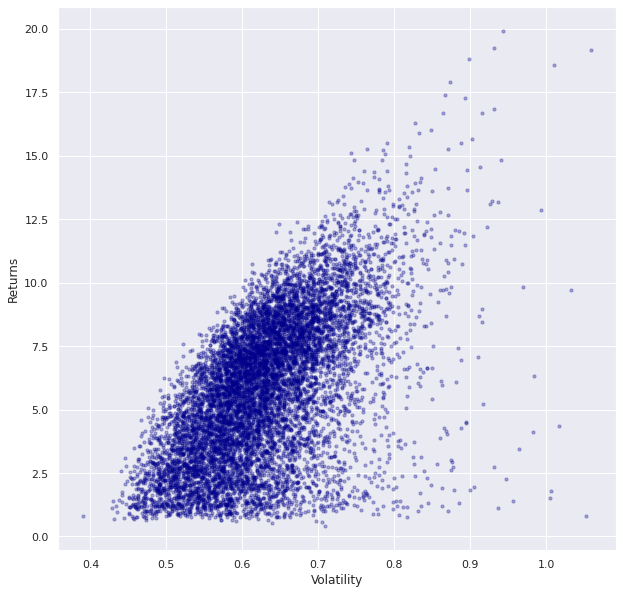

In [25]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], color='darkblue');

In [26]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.81
Volatility        0.39
TESLA weight      0.01
AMZN weight       0.57
ETH-USD weight    0.04
DATA_DOG weight   0.15
BTC weight        0.19
MATIC weight      0.01
CL=F weight       0.04
Name: 2179, dtype: float64

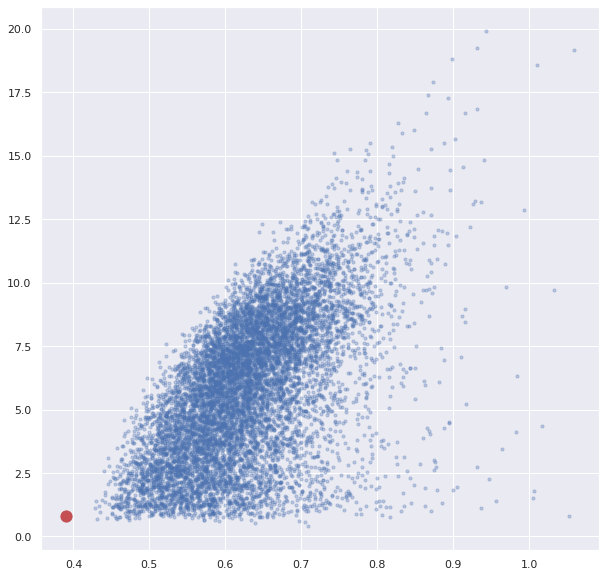

In [27]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='.', s=500);

In [28]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           19.90
Volatility         0.94
TESLA weight       0.02
AMZN weight        0.14
ETH-USD weight     0.05
DATA_DOG weight    0.15
BTC weight         0.05
MATIC weight       0.55
CL=F weight        0.02
Name: 8107, dtype: float64

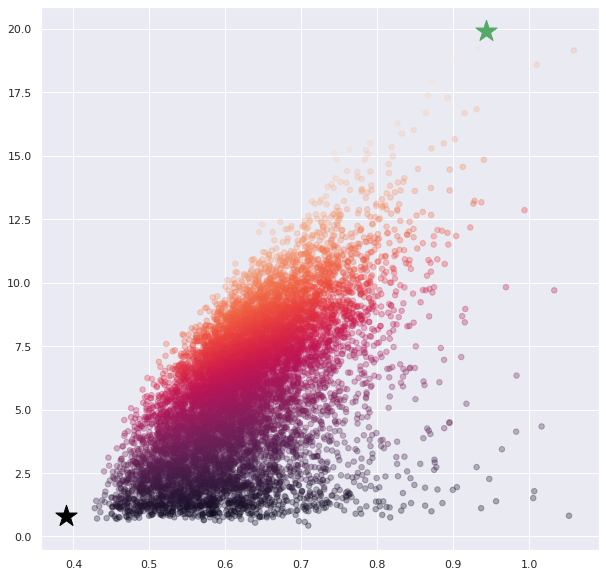

In [29]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
sharpe_err = portfolios['Returns'] / portfolios['Volatility']
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=sharpe_err, s=30, alpha=0.3,)
plt.scatter(min_vol_port[1], min_vol_port[0], color='black', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500);